In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
for dirname,_,filenames in os.walk ('/Users/anishsoni/Desktop/US_Fed/US.csv'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [3]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


## Importing the Libraries

In [4]:
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

## Reading Data

In [5]:
df = pd.read_csv('/Users/anishsoni/Desktop/US_Fed/US.csv')

In [6]:
df.head()

,Release Date,Time,Actual,Forecast,Previous
0,"Nov 01, 2023",13:00,5.50%,5.50%,5.50%
1,"Sep 20, 2023",13:00,5.50%,5.50%,5.50%
2,"Jul 26, 2023",13:00,5.50%,5.50%,5.25%
3,"Jun 14, 2023",13:00,5.25%,5.25%,5.25%
4,"May 03, 2023",13:00,5.25%,5.25%,5.00%


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Release Date  201 non-null    object
 1   Time          201 non-null    object
 2   Actual        201 non-null    object
 3   Forecast      201 non-null    object
 4   Previous      201 non-null    object
dtypes: object(5)
memory usage: 8.0+ KB


In [8]:
df.shape

(201, 5)

In [9]:
df.isna().sum()

Release Date    0
Time            0
Actual          0
Forecast        0
Previous        0
dtype: int64

## Data Pre-Processing

In [10]:
# Convert 'Release Date' to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'] + ' ' + df['Time'], errors='coerce')

# Convert percentage columns to numeric format, handling non-numeric values
percent_columns = ['Actual', 'Forecast', 'Previous']
for column in percent_columns:
    df[column] = pd.to_numeric(df[column].str.rstrip('%'), errors='coerce')


In [11]:
df.head()

,Release Date,Time,Actual,Forecast,Previous
0,2023-11-01 13:00:00,13:00,5.50,5.50,5.50
1,2023-09-20 13:00:00,13:00,5.50,5.50,5.50
2,2023-07-26 13:00:00,13:00,5.50,5.50,5.25
3,2023-06-14 13:00:00,13:00,5.25,5.25,5.25
4,2023-05-03 13:00:00,13:00,5.25,5.25,5.00


## Analyzing trends in the Federal Funds over time

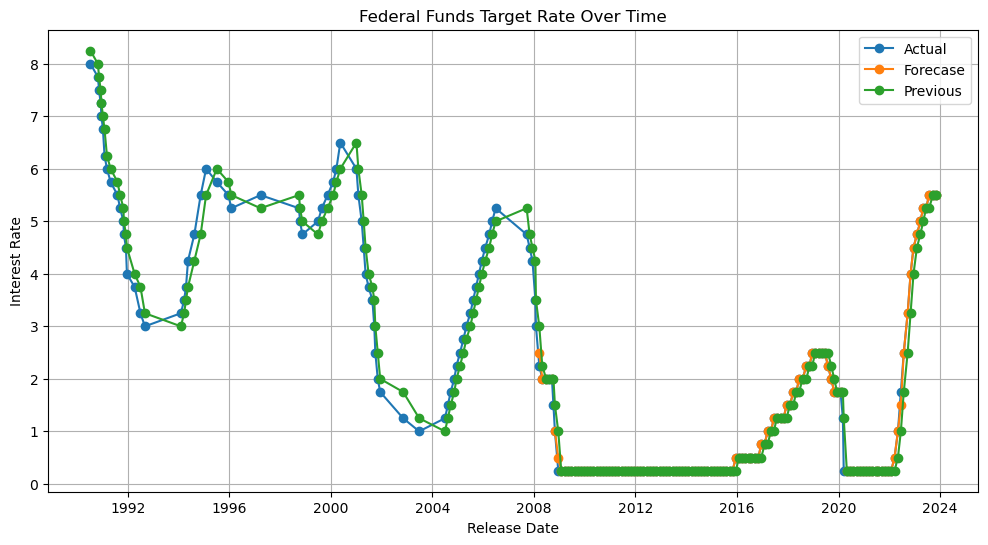

In [13]:
#Plotting the trends over time
plt.figure(figsize=(12,6))

#Plot Actual, Forecast and Previous rates
plt.plot(df['Release Date'], df['Actual'], label = 'Actual', marker = 'o')
plt.plot(df['Release Date'], df['Forecast'], label = 'Forecase', marker = 'o')
plt.plot(df['Release Date'], df['Previous'], label = 'Previous', marker = 'o')

plt.title('Federal Funds Target Rate Over Time')
plt.xlabel('Release Date')
plt.ylabel('Interest Rate')
plt.legend()
plt.grid(True)
plt.show()

## Forecasting the future path of the Federal funds target rate

/Users/anishsoni/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anishsoni/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anishsoni/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anishsoni/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be

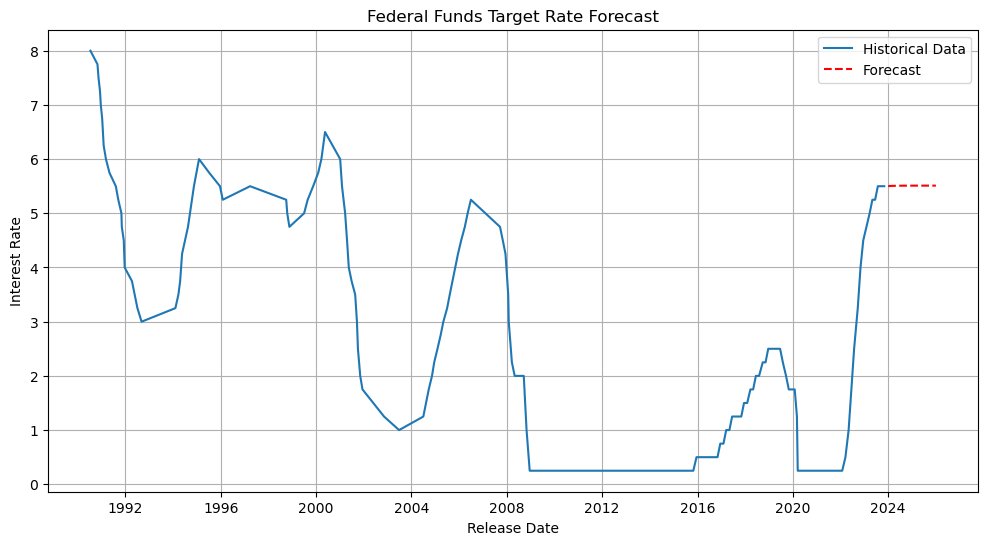

In [15]:
#Sort Dataframe by release date in ascending order
df.sort_values('Release Date', inplace= True)

#Extracting time series data for modelling
time_series_data = df[['Release Date','Actual']].set_index('Release Date')

#Fit ARIMA model
model = ARIMA(time_series_data, order=(1,1,1))
results = model.fit()

# Sort DataFrame by 'Release Date' in ascending order
df.sort_values('Release Date', inplace=True)

# Extracting time series data for modeling
time_series_data = df[['Release Date', 'Actual']].set_index('Release Date')

# Fit ARIMA model
model = ARIMA(time_series_data, order=(1, 1, 1))  # Adjust order as needed
results = model.fit()

# Forecast future values into 2023
forecast_steps = 25
last_date = time_series_data.index[-1]
forecast_index = pd.date_range(last_date, periods=forecast_steps + 1, freq='M')[1:]
forecast_values = results.get_forecast(steps=forecast_steps).predicted_mean

# Plotting historical data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Historical Data')
plt.plot(forecast_index, forecast_values, label='Forecast', linestyle='--', color='red')
plt.title('Federal Funds Target Rate Forecast')
plt.xlabel('Release Date')
plt.ylabel('Interest Rate')
plt.legend()
plt.grid(True)
plt.show()

## Hyperparameter tuning

/Users/anishsoni/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anishsoni/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anishsoni/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anishsoni/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index begin

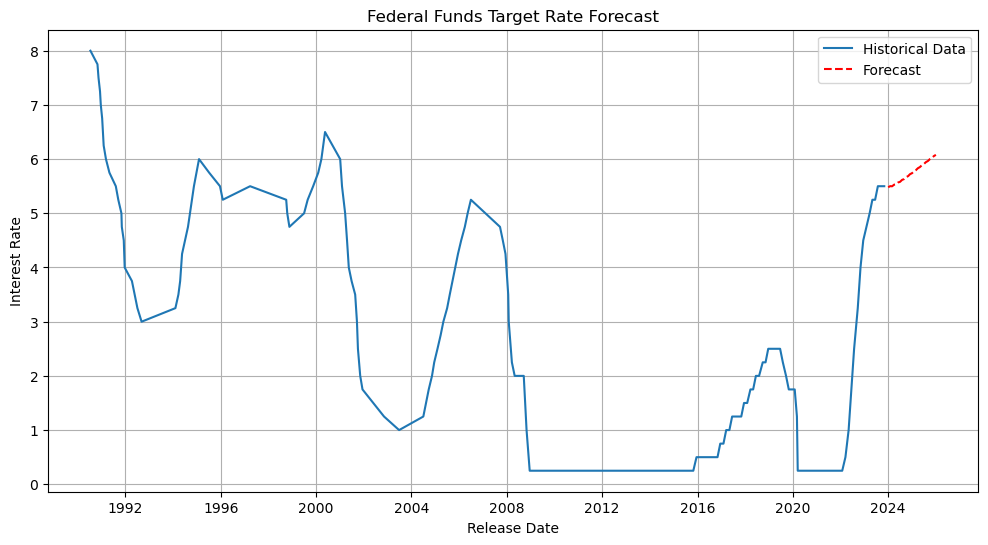

Optimal ARIMA Order: (2, 2, 2)


In [16]:
# Extracting time series data for modeling
time_series_data = df[['Release Date', 'Actual']].set_index('Release Date')

# Perform hyperparameter tuning with auto_arima
model = auto_arima(time_series_data, suppress_warnings=True, seasonal=False, stepwise=True)
order = model.get_params()['order']

# Fit ARIMA model with the optimal order
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(time_series_data, order=order)
results = arima_model.fit()

# Forecast future values into 2023
forecast_steps = 25  # You can adjust the number of steps into the future
last_date = time_series_data.index[-1]
forecast_index = pd.date_range(last_date, periods=forecast_steps + 1, freq='M')[1:]
forecast_values = results.get_forecast(steps=forecast_steps).predicted_mean

# Plotting historical data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Historical Data')
plt.plot(forecast_index, forecast_values, label='Forecast', linestyle='--', color='red')
plt.title('Federal Funds Target Rate Forecast')
plt.xlabel('Release Date')
plt.ylabel('Interest Rate')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal ARIMA Order: {order}")